Integrantes del grupo:             -Diego Bravo (19.806.607-9) ​

                                        -Matías Morales (20.305.081-k) ​

                                        -Vicente Reyes (20.564.697-3) ​

                                       -José Sepúlveda (20.563.679-k) ​

                                       -Sofia Silva (20.376.851-6) ​

                                       -Carlos Tapia (20.563.35-0)

####################################################################################################
Ejercicio 1
####################################################################################################

    valores de fi:  [229.3  290.05 351.2  403.25 437.9 ]
divisores en L(i):  [24. -6.  4. -6. 24.]

Polinomio de Lagrange, expresiones
9.55416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 2) - 48.3416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 1) + 87.8*(x - 5)*(x - 4)*(x - 2)*(x - 1) - 67.2083333333333*(x - 5)*(x - 3)*(x - 2)*(x - 1) + 18.2458333333333*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Polinomio de Lagrange: 
0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65


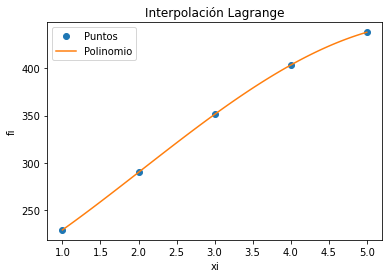

In [2]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi= np.array([1, 2, 3, 4, 5])
fi= np.array([229.30, 290.05, 351.20, 403.25, 437.90])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
#plt.ylim(0,3)
plt.show()

[-1.2865592026210877, 5.861709007562537, 26.67485019505855]
x = -1.286559 (Min)
x = 5.861709 (Max)
x = 26.674850 (Min)
Valor máximo de la bolsa:  448.3369198571262


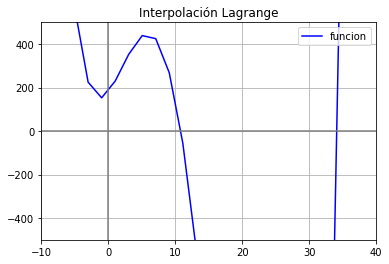

In [7]:
from sympy import *
from sympy.plotting import plot
from sympy.abc import x
def maxminf(f):
    """ Calcula los máximos y mínimos de una función f(x) """
    df = diff(f, x) # 1era. derivada
    d2f = diff(f, x, 2) # 2da. derivada
    pcs = solve(Eq(df,0)) # puntos críticos
    pc=[]
    for i in range(len(pcs)):
        aux=complex(pcs[i])
        pc.append(aux.real)
    print(pc)
    for p in pc:
        if d2f.subs(x,p)>0: 
            tipo="Min"
        elif d2f.subs(x,p)<0: 
            tipo="Max"
        else: 
            tipo="Indefinido"
        print("x = %f (%s)"%(p,tipo))
maxminf(0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65)

import numpy as np
import matplotlib.pyplot as plt

def h(x):
    return (0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65)
v = [-10,40,-500,500]
np.seterr(divide='ignore', invalid='ignore')
x=np.linspace(-100,100,100)
plt.plot(x,h(x),'blue',label='funcion')
plt.axhline(0, color="gray")
plt.axvline(x=0, color="gray")
plt.legend(loc=1)
plt.title('Interpolación Lagrange')
plt.axis(v)
plt.grid()


print("Valor máximo de la bolsa: ",h(5.861709))

Los parametros de la regresión lineal 
w = [ 0.         79.31142857 -4.37857143], b = 152.5700000000005


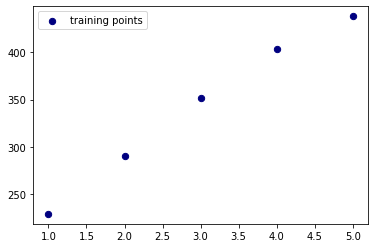

In [2]:
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x= np.array([1, 2, 3, 4, 5])
y= np.array([229.30, 290.05, 351.20, 403.25, 437.90])
########################################
plt.scatter(x, y, color='navy', s=40, marker='o', label='training points')
plt.legend(loc='upper left')

# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 2) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print("Los parametros de la regresión lineal ")
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
coef=regresion_lineal.coef_

f=coef[-1]*x**2+coef[-2]*x+regresion_lineal.intercept_


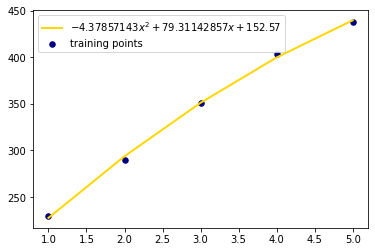

In [12]:
from sklearn.metrics import mean_squared_error 
# importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o', label='training points')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='gold', linewidth=2,
         label='$-4.37857143x^2+79.31142857x+152.57$')
######################### Agregamos y mostramos leyendas ##########################
plt.legend(loc='upper left')
plt.show()


x = 9.056770 (Max)
Valor máximo de la bolsa:  511.72268269439996


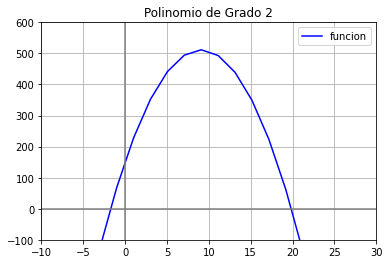

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot
from sympy.abc import x
def maxminf(f):
    """ Calcula los máximos y mínimos de una función f(x) """
    df = diff(f, x) # 1era. derivada
    d2f = diff(f, x, 2) # 2da. derivada
    pcs = solve(Eq(df,0)) # puntos críticos
    pc=[]
    maxx=[]
    for i in range(len(pcs)):
        aux=complex(pcs[i])
        pc.append(aux.real)
    for p in pc:
        if d2f.subs(x,p)>0: 
            tipo="Min"
        elif d2f.subs(x,p)<0: 
            tipo="Max"
            maxx.append(p)
        else: 
            tipo="Indefinido"
        print("x = %f (%s)"%(p,tipo))
    return maxx
def h(x):
    return (-4.37857143*x**2+79.31142857*x+152.5700000000005)

maxx = maxminf(-4.37857143*x**2+79.31142857*x+152.5700000000005)

print("Valor máximo de la bolsa: ",h(maxx[0]))
v = [-10,30,-100,600]
np.seterr(divide='ignore', invalid='ignore')
x=np.linspace(-100,100,100)
plt.plot(x,h(x),'blue',label='funcion')
plt.axhline(0, color="gray")
plt.axvline(x=0, color="gray")
plt.legend(loc=1)
plt.title('Polinomio de Grado 2')
plt.axis(v)
plt.grid()



Resultados Actividad 1: Los parametros obtenidos por el modelo de lagrange, fueron 0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65, valor maximo obtenido por Lagrange fue de 448.3369198571262, en el tiempo 5.861709. Al realizar el polinomio de interpolación de segundo orden al mismo conjunto de datos obtenemos que el maximo fue de 511.72268269439996 en el tiempo 9.056770, por lo que inmediatamente podemos concluir que los resultados varian dependiendo del modelo que utilizemos para realizar la interpolación, siendo así el más apropiado el polinomio de segundo orden.

###Ejercicio 2###

In [9]:
import numpy as np
from scipy.interpolate import CubicSpline

# calculate 5 natural cubic spline polynomials for 9 points
x = np.array([0, 0.5, 1.0, 1.5, 2.0])
y = np.array([0.0, -1.0, -0.7, -0.2, 0.0])

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')
cs.c

# Polynomial coefficients for 0 <= x <= 0.5
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 0.5 < x <= 1
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# Polynomial coefficients for 1 < x <= 1.5
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Polynomial coefficients for 1.5 < x <= 2
a3 = cs.c.item(3,3)
b3 = cs.c.item(2,3)
c3 = cs.c.item(1,3)
d3 = cs.c.item(0,3)

# Print polynomial equations for different x regions
print('S0(0 <=x<= 0.5)=\n ', a0, ' + ', b0, '(x-0) +', c0, '(x-0)^2 + ', d0, '(x-0)^3')
print('\nS1(0.5<x<= 1  )=\n ', a1, ' + ', b1, '(x-0.5) +', c1, '(x-0.5)^2 + ', d1, '(x-0.5)^3')
print('\nS1(1  <x<= 1.5)=\n ', a2, ' + ', b2, '(x-1) +', c2, '(x-1)^2 + ', d2, '(x-1)^3')
print('\nS1(1.5<x<= 2.0)=\n ', a3, ' + ', b3, '(x-1.5) +', c3, '(x-1.5)^2 + ', d3, '(x-1.5)^3')

S0(0 <=x<= 0.5)=
  0.0  +  -2.657142857142857 (x-0) + -8.881784197001252e-16 (x-0)^2 +  2.62857142857143 (x-0)^3

S1(0.5<x<= 1  )=
  -1.0  +  -0.6857142857142856 (x-0.5) + 3.942857142857142 (x-0.5)^2 +  -2.7428571428571424 (x-0.5)^3

S1(1  <x<= 1.5)=
  -0.7  +  1.2000000000000002 (x-1) + -0.17142857142857237 (x-1)^2 +  -0.4571428571428564 (x-1)^3

S1(1.5<x<= 2.0)=
  -0.2  +  0.6857142857142854 (x-1.5) + -0.8571428571428563 (x-1.5)^2 +  0.5714285714285712 (x-1.5)^3


In [10]:
import numpy as np
from scipy.interpolate import CubicSpline

# calculate 5 natural cubic spline polynomials for 9 points

x = np.array([0, 0.5, 1.0, 1.5, 2.0])
y = np.array([0.0, 1.0, 0.7, 0.2, 0.0])

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')
cs.c

# Polynomial coefficients for 0 <= x <= 0.5
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 0.5 < x <= 1
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# Polynomial coefficients for 1 < x <= 1.5
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Polynomial coefficients for 1.5 < x <= 2
a3 = cs.c.item(3,3)
b3 = cs.c.item(2,3)
c3 = cs.c.item(1,3)
d3 = cs.c.item(0,3)

# Print polynomial equations for different x regions
print('S0(0   <= x <= 0.5 ) =\n ', a0, ' + ', b0, '(x-0) + ', c0, '(x-0)^2 +', d0, '(x-0)^3')
print('\nS1(0.5 <  x <= 1   ) =\n ', a1, ' + ', b1, '(x-0.5) + ', c1, '(x-0.5)^2 +', d1, '(x-0.5)^3')
print('\nS1(1   <  x <= 1.5 ) =\n ', a2, ' + ', b2, '(x-1) + ', c2, '(x-1)^2 +', d2, '(x-1)^3')
print('\nS1(1.5 <  x <= 2.0 ) =\n ', a3, ' + ', b3, '(x-1.5) + ', c3, '(x-1.5)^2 +', d3, '(x-1.5)^3')


S0(0   <= x <= 0.5 ) =
  0.0  +  2.657142857142857 (x-0) +  8.881784197001252e-16 (x-0)^2 + -2.62857142857143 (x-0)^3

S1(0.5 <  x <= 1   ) =
  1.0  +  0.6857142857142856 (x-0.5) +  -3.942857142857142 (x-0.5)^2 + 2.7428571428571424 (x-0.5)^3

S1(1   <  x <= 1.5 ) =
  0.7  +  -1.2000000000000002 (x-1) +  0.17142857142857237 (x-1)^2 + 0.4571428571428564 (x-1)^3

S1(1.5 <  x <= 2.0 ) =
  0.2  +  -0.6857142857142854 (x-1.5) +  0.8571428571428563 (x-1.5)^2 + -0.5714285714285712 (x-1.5)^3


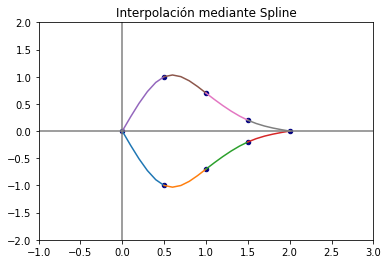

In [13]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from matplotlib import pyplot
import numpy as np
# Función cuadrática.
def f1(x):
    return 0-2.657142857142857*x - (8.881784197001252*(10**(-16)))*x**(2)+2.62857142857143* x**(3)
def f2(x):
    return -1.0-0.6857142857142856*(x-0.5)+3.942857142857142*(x-0.5)**2-2.742857142857142*(x-0.5)**3
def f3(x):
    return -0.7+1.2000000000000002*(x-1)-0.17142857142857237*(x-1)**2-0.4571428571428564*(x-1)**3
def f4(x):
    return -0.2+0.6857142857142854*(x-1.5)-0.8571428571428563*(x-1.5)**2+0.5714285714285712*(x-1.5)**3
def f5(x):
    return 0+2.657142857142857*(x-0)+8.881784197001252*(10**(-16))*(x-0)**2-2.62857142857143*(x-0)**3
def f6(x):
    return 1.0+0.6857142857142856*(x-0.5)-3.942857142857142*(x-0.5)**2+2.7428571428571424*(x-0.5)**3
def f7(x):
    return 0.7-1.2000000000000002*(x-1)+0.17142857142857237*(x-1)**2+0.4571428571428564*(x-1)**3
def f8(x):
    return 0.2-0.6857142857142854*(x-1.5)+0.8571428571428563*(x-1.5)**2-0.5714285714285712*(x-1.5)**3
# Valores del eje X que toma el gráfico.
x1 = np.arange(0,0.6,0.1)
x2 = np.arange(0.5,1.01,0.1)
x3 = np.arange(1,1.51,0.1)
x4 = np.arange(1.5,2.01,0.1)
# Graficar ambas funciones.
pyplot.plot(x1, [f1(i) for i in x1])
pyplot.plot(x2, [f2(i) for i in x2])
pyplot.plot(x3, [f3(i) for i in x3])
pyplot.plot(x4, [f4(i) for i in x4])
pyplot.plot(x1, [f5(i) for i in x1])
pyplot.plot(x2, [f6(i) for i in x2])
pyplot.plot(x3, [f7(i) for i in x3])
pyplot.plot(x4, [f8(i) for i in x4])
# Establecer el color de los ejes.
pyplot.axhline(0, color="grey")
pyplot.axvline(0, color="grey")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 3)
pyplot.ylim(-2, 2)
pyplot.scatter(2, 0, color='navy', s=20, marker='o')
pyplot.scatter(1.5, 0.2, color='navy', s=20, marker='o')
pyplot.scatter(1, 0.7, color='navy', s=20, marker='o')
pyplot.scatter(0.5, 1, color='navy', s=20, marker='o')
pyplot.scatter(0, 0, color='navy', s=20, marker='o')
pyplot.scatter(1.5, -0.2, color='navy', s=20, marker='o')
pyplot.scatter(1, -0.7, color='navy', s=20, marker='o')
pyplot.scatter(0.5, -1, color='navy', s=20, marker='o')
pyplot.title('Interpolación mediante Spline')
# Mostrarlo.
pyplot.show()

Resultados Actividad 2: Para la resolución de este ejercicio se utilizó spline debido a que no era posible realizar una interpolación polinomial al conjunto de puntos establecido, además fue necesario separar el conjunto de puntos en dos intervalos ya que los puntos eran decrecientes en el intervalo 2 a 0, y luego creciente de 0 a 2, esto resulto en que se utilizáran dos spline, uno para cada intervalo.

####Ejercicio 3####

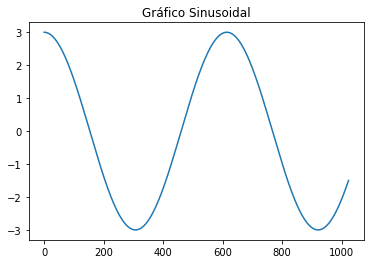

Desviación Estandar :  2.150794056840507
Promedio :  -0.2471211335240901


In [7]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
x = np.linspace(0, 5, 2**10,endpoint=True)
#print("x =",x)
Coseno = 3*np.cos((2*np.pi*x)/3)
plt.plot(Coseno)
plt.title('Gráfico Sinusoidal')
show()
print("Desviación Estandar : ",numpy.std(Coseno))
mean = statistics.mean(Coseno)
print("Promedio : ",mean)


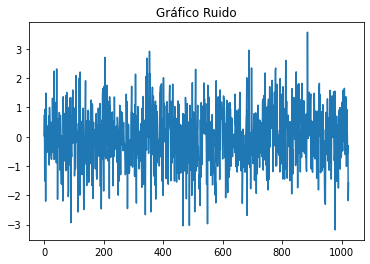

Desviación Estandar :  1.0094144783556587
Promedio :  0.0011383104040098685


In [6]:
import numpy as np
import statistics
noise = np.random.normal(0,1,2**10)
plt.plot(noise)
plt.title('Gráfico Ruido')
show()
print("Desviación Estandar : ",numpy.std(noise))
mean = statistics.mean(noise)
print("Promedio : ",mean)

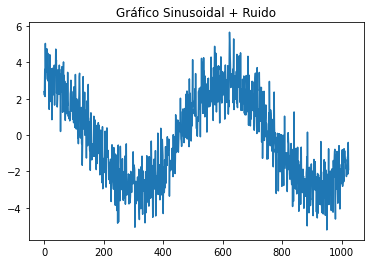

Desviación Estandar :  2.3496738012006766
Promedio :  -0.2041529417352325


In [20]:
import numpy
import statistics
suma = Coseno + noise
plt.plot(suma)
plt.title('Gráfico Sinusoidal + Ruido')
show()
print("Desviación Estandar : ",numpy.std(suma))
mean = statistics.mean(suma)
print("Promedio : ",mean)

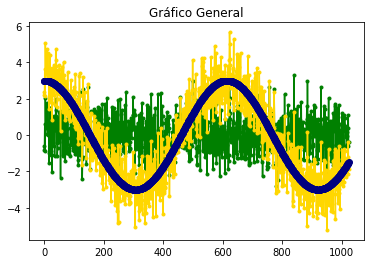

In [27]:
plt.plot(noise,color='green', marker='.', label='training points')
plt.plot(suma,color='gold', marker='.', label='training points')
plt.plot(Coseno,color='navy', marker='o', label='training points')
plt.title('Gráfico General')
show()

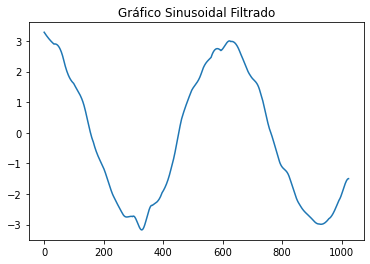

Desviación Estandar :  2.137230167334701
Promedio :  -0.20551879777611787


In [24]:
import numpy.polynomial as P
import numpy
import statistics
n = 33
K = 2
x = suma
Nx = len(x)
yc = []
Nw = 2*n+1 # window size
No = n+1 # overlap

# compute weights
wa = []
wb = []
for i in range(0,No,1): # [0,...,64]
    wa.append(1-((i+1)-1)/n)
    wb.append(((i+1)-1)/n)

# compute the trend data
idNw = np.array(range(1,Nw+1,1))
idNwx = np.array(range(0,Nw,1))
p,coef = P.polynomial.polyfit(idNw, x[idNwx],K,full=True)
ya = P.polynomial.polyval(idNw,p)
yc[0:n] = ya[0:n]
for i in range(Nw-1,Nx,n):
    ni = n+i
    m = np.amin(np.array([ni,Nx-1]))
    idx = np.array(range(i-No+1,m+1,1))
    p,coef = P.polynomial.polyfit(idx,x[idx],K,full=True)
    yb = P.polynomial.polyval(idx,p)
    yc[i-No+1:i+1] = wa*ya[n:Nw]+wb*yb[0:n+1]
    ya = yb
idyc = np.array(range(i,m+1,1))
p,coef = P.polynomial.polyfit(idyc, x[idyc],K,full=True)
yx = P.polynomial.polyval(idyc,p)
yc[i+1:m+1]=yx[i:m+1]

plt.plot(yc)
plt.title('Gráfico Sinusoidal Filtrado')
show()
print("Desviación Estandar : ",numpy.std(yc))
mean = statistics.mean(yc)
print("Promedio : ",mean)


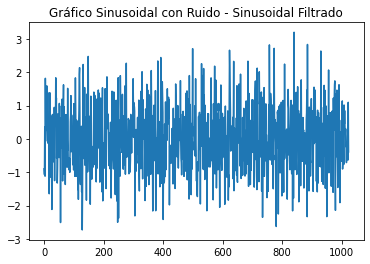

Desviación Estandar :  0.9646514122656172
Promedio :  0.0013658560408853803


In [26]:
Resta = suma-yc
plt.plot(Resta)
plt.title('Gráfico Sinusoidal con Ruido - Sinusoidal Filtrado')
show()
print("Desviación Estandar : ",numpy.std(Resta))
mean = statistics.mean(Resta)
print("Promedio : ",mean)

Resultados Actividad 3: Realizando la comparación de los valores de desviación estandar y de promedio podemos darnos cuenta de que estos son muy similares entre las series sinusoidales y de ruido en contraste con sus versiones obtenidas a traves del filtrado por medio de interpolación polinomial. La principal aplicación de este metodo es la limpieza y filtrado de datos, permitiendo asi la generación de una curva más optima y representativa de la función que se busca ajustar al modelo de datos.